In [1]:
# Dependencies
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json
import tweepy
import time
import warnings
warnings.filterwarnings("ignore")
import api_keys

# Initialize Sentiment Analyzer 
from textblob import TextBlob
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# Twitter API Keys
consumer_key = api_keys.consumer_key
consumer_secret = api_keys.consumer_secret
access_token = api_keys.access_token
access_token_secret = api_keys.access_token_secret

In [2]:
# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

# Select News Sources (Twitter Accounts)
news_source = ["FoxNews", "CNN", "BBCWorld", "CBSNews", "nytimes"]

In [3]:
# Create a generic dictionary for holding all tweet information
tweet_data = {
    "tweet_source": [],
    "tweet_text": [],
    "tweet_date": [],
    "tweet_vader_score": [],
    "tweet_neg_score": [],
    "tweet_pos_score": [],
    "tweet_neu_score": []
}

# Grab 100 tweets from each site (total 500)
for x in range(5):

    # Loop through all news sources
    for source in news_source:

        # Grab the tweets
        tweets = api.user_timeline(source, page=x)

        # For each tweet store it into the dictionary
        for tweet in tweets:
            
            # All data is grabbed from the JSON returned by Twitter
            tweet_data["tweet_source"].append(tweet["user"]["name"])
            tweet_data["tweet_text"].append(tweet["text"])
            tweet_data["tweet_date"].append(tweet["created_at"])

            # Run sentiment analysis on each tweet using Vader
            tweet_data["tweet_vader_score"].append(analyzer.polarity_scores(tweet["text"])["compound"])
            tweet_data["tweet_pos_score"].append(analyzer.polarity_scores(tweet["text"])["pos"])
            tweet_data["tweet_neu_score"].append(analyzer.polarity_scores(tweet["text"])["neu"])
            tweet_data["tweet_neg_score"].append(analyzer.polarity_scores(tweet["text"])["neg"])

In [4]:
# Store the final contents into a DataFrame
tweet_df = pd.DataFrame(tweet_data, columns=["tweet_source", 
                                             "tweet_text", 
                                             "tweet_date",
                                             "tweet_vader_score",
                                             "tweet_pos_score",
                                             "tweet_neu_score",
                                             "tweet_neg_score"])

# Export to CSV
file_name = str(time.strftime("%m-%d-%y")) + "-tweets.csv"
tweet_df.to_csv("analysis/" + file_name, encoding="utf-8")

# Visualize the DataFrame
tweet_df.head()

,tweet_source,tweet_text,tweet_date,tweet_vader_score,tweet_pos_score,tweet_neu_score,tweet_neg_score
0,Fox News,"Sen. John McCain: ""What greater cause could we...",Mon Aug 27 05:45:00 +0000 2018,0.8720,0.405,0.595,0.0
1,Fox News,Hawaii's team celebrates together after their ...,Mon Aug 27 05:38:00 +0000 2018,0.8176,0.306,0.694,0.0
2,Fox News,".@RealCandaceO: ""Liberalism to me means bondag...",Mon Aug 27 05:30:00 +0000 2018,0.8555,0.359,0.641,0.0
3,Fox News,.@FBI swarms family home of Jacksonville Landi...,Mon Aug 27 05:23:00 +0000 2018,0.0000,0.000,1.000,0.0
4,Fox News,".@WillieNelson: ""I enjoy the audience, I enjoy...",Mon Aug 27 05:15:00 +0000 2018,0.8360,0.389,0.611,0.0


In [5]:
# Count the total number of tweets
tweet_df.count()

tweet_source         500
tweet_text           500
tweet_date           500
tweet_vader_score    500
tweet_pos_score      500
tweet_neu_score      500
tweet_neg_score      500
dtype: int64

In [6]:
# Obtain the source names for reference
tweet_df["tweet_source"].unique()

array(['Fox News', 'CNN', 'BBC News (World)', 'CBS News',
       'The New York Times'], dtype=object)

In [7]:
# Convert dates (currently strings) into datetimes
tweet_df["tweet_date"] = pd.to_datetime(tweet_df["tweet_date"])

# Sort the dataframe by date
tweet_df.sort_values("tweet_date", inplace=True)
tweet_df.reset_index(drop=True, inplace=True)

# Preview the data to confirm data is sorted
tweet_df.head()

,tweet_source,tweet_text,tweet_date,tweet_vader_score,tweet_pos_score,tweet_neu_score,tweet_neg_score
0,BBC News (World),Uganda's Bobi Wine crisis: The president and t...,2018-08-24 23:21:22,-0.6249,0.0,0.709,0.291
1,BBC News (World),Obituary: Chicha Mariani and the 42-year searc...,2018-08-24 23:24:11,0.0000,0.0,1.000,0.000
2,BBC News (World),Venezuela nears 'Mediterranean crisis point' h...,2018-08-25 00:24:32,-0.6249,0.0,0.549,0.451
3,BBC News (World),Jean-Pierre Bemba 'cannot run for DRC presiden...,2018-08-25 03:44:27,0.0000,0.0,1.000,0.000
4,BBC News (World),"RT @MartinBashir: Boarding Shepherd One, the P...",2018-08-25 07:03:01,0.0000,0.0,1.000,0.000


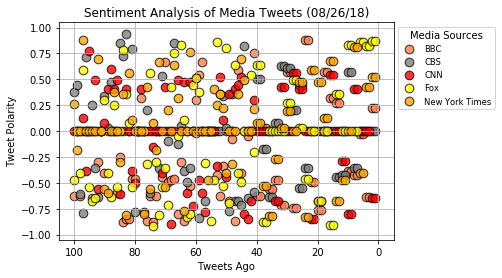

In [9]:
plt.scatter(np.arange(-len(tweet_df[tweet_df["tweet_source"] == "BBC News (World)"]), 0, 1), 
            tweet_df[tweet_df["tweet_source"] == "BBC News (World)"]["tweet_vader_score"],
            edgecolor="black", linewidths=1, marker="o", color="coral", s=75,
            alpha=0.8, label="BBC")

plt.scatter(np.arange(-len(tweet_df[tweet_df["tweet_source"] == "CBS News"]), 0, 1), 
            tweet_df[tweet_df["tweet_source"] == "CBS News"]["tweet_vader_score"],
            edgecolor="black", linewidths=1, marker="o", color="gray", s=75,
            alpha=0.8, label="CBS")

plt.scatter(np.arange(-len(tweet_df[tweet_df["tweet_source"] == "CNN"]), 0, 1), 
            tweet_df[tweet_df["tweet_source"] == "CNN"]["tweet_vader_score"],
            edgecolor="black", linewidths=1, marker="o", color="red", s=75,
            alpha=0.8, label="CNN")

plt.scatter(np.arange(-len(tweet_df[tweet_df["tweet_source"] == "Fox News"]), 0, 1), 
            tweet_df[tweet_df["tweet_source"] == "Fox News"]["tweet_vader_score"],
            edgecolor="black", linewidths=1, marker="o", color="yellow", s=75,
            alpha=0.8, label="Fox")

plt.scatter(np.arange(-len(tweet_df[tweet_df["tweet_source"] == "The New York Times"]), 0, 1), 
            tweet_df[tweet_df["tweet_source"] == "The New York Times"]["tweet_vader_score"],
            edgecolor="black", linewidths=1, marker="o", color="orange", s=75,
            alpha=0.8, label="New York Times")

# Incorporate the other graph properties
plt.title("Sentiment Analysis of Media Tweets (%s)" % time.strftime("%x"))
plt.ylabel("Tweet Polarity")
plt.xlabel("Tweets Ago")
plt.xlim([-105, 5])
plt.xticks([-100, -80, -60, -40, -20, 0], [100, 80, 60, 40, 20, 0])
plt.ylim([-1.05, 1.05])
plt.grid(True)

# Create a legend
lgnd = plt.legend(fontsize="small", mode="Expanded", 
                  numpoints=1, scatterpoints=1, 
                  loc="upper left", bbox_to_anchor=(1,1), title="Media Sources", 
                  labelspacing=0.5)

# Save the figure (and account for the legend being outside the plot when saving)
file_name = str(time.strftime("%m-%d-%y")) + "-Fig1.png"
plt.savefig("analysis/" + file_name, bbox_extra_artists=(lgnd, ), bbox_inches='tight')

# Show plot
plt.show()

## Overall Sentiment Bar Graph

In [10]:
# Average all polarities by news source
tweet_df_polarity = tweet_df.groupby(["tweet_source"]).mean()["tweet_vader_score"]

# View the polarities
pd.DataFrame(tweet_df_polarity)

,tweet_vader_score
tweet_source,
BBC News (World),-0.197630
CBS News,-0.027494
CNN,-0.041547
Fox News,-0.004085
The New York Times,0.036334


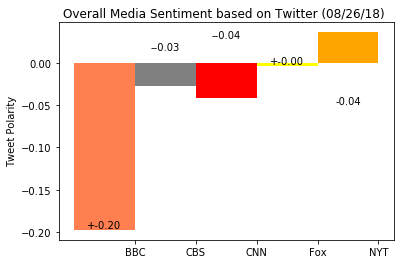

In [12]:
# Store all polarities in a tuple
tweets_polarity = (tweet_df_polarity["BBC News (World)"], 
                    tweet_df_polarity["CBS News"], 
                    tweet_df_polarity["CNN"], 
                    tweet_df_polarity["Fox News"],
                    tweet_df_polarity["The New York Times"])

# Generate bars for each news source
fig, ax = plt.subplots()
ind = np.arange(len(tweets_polarity))  
width = 1
rect1 = ax.bar(ind[0], tweets_polarity[0], width, color="coral")
rect2 = ax.bar(ind[1], tweets_polarity[1], width, color="gray")
rect3 = ax.bar(ind[2], tweets_polarity[2], width, color="red")
rect4 = ax.bar(ind[3], tweets_polarity[3], width, color='yellow')
rect5 = ax.bar(ind[4], tweets_polarity[4], width, color='orange')

# Generate labels for each news source
def autolabelpos(rects):
    # attach some text labels
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1*height,
                '+%.2f' % float(height),
                ha='center', va='bottom')

def autolabelneg(rects):
    # attach some text labels
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., -1*height-0.015,
                '-%.2f' % float(height),
                ha='center', va='bottom')
    
autolabelpos(rect1)
autolabelneg(rect2)
autolabelneg(rect3)
autolabelpos(rect4)
autolabelneg(rect5)

# Orient widths, add labels, tick marks, etc. 
ax.set_ylabel("Tweet Polarity")
ax.set_title("Overall Media Sentiment based on Twitter (%s) " % (time.strftime("%x")))
ax.set_xticks(ind + 0.5)
ax.set_xticklabels(("BBC", "CBS", "CNN", "Fox", "NYT"))
ax.set_autoscaley_on(True)
ax.grid(False)

# Save Figure
file_name = str(time.strftime("%m-%d-%y")) + "-Fig2.png"
plt.savefig("analysis/" + file_name, bbox_extra_artists=(lgnd, ), bbox_inches='tight')

# Show Figure
fig.show()